In [38]:
# from numpy import append
# import pandas as pd
# from collections import defaultdict

# # 讀入交通資料
# traffic_A1 = pd.read_csv("data/108A1.csv")
# traffic_A2_First = pd.read_csv("data/108A2_first_half.csv")
# traffic_A2_Second = pd.read_csv("data/108A2_second_half.csv")

# # 讀入六都氣象資料
# # w_kaohsiung = pd.read_csv("data/W_Kaohsiung.csv")
# # w_NewTaipei = pd.read_csv("data/W_NewTaipei.csv")
# # w_Taichung = pd.read_csv("data/W_Taichung.csv")
# # w_Tainan = pd.read_csv("data/W_Tainan.csv")
# # w_Taipei = pd.read_csv("data/W_Taipei.csv")
# # w_Taoyuan = pd.read_csv("data/W_Taoyuan.csv")

# #將2019年所有資料放入
# def put_event_in_area(district):
#     output = []
#     for i in range(0,len(traffic_A1["發生時間"])):
#         if traffic_A1["發生地點"][i][0:3] == district:
#             output.append([traffic_A1["發生時間"][i],traffic_A1["發生地點"][i],traffic_A1["死亡受傷人數"][i],traffic_A1["車種"][i],traffic_A1["經度"][i],traffic_A1["緯度"][i]])
#     for i in range(0,len(traffic_A2_First["發生時間"])):
#         if traffic_A2_First["發生地點"][i][0:3] == district:
#             output.append([traffic_A2_First["發生時間"][i],traffic_A2_First["發生地點"][i],traffic_A2_First["死亡受傷人數"][i],traffic_A2_First["車種"][i],traffic_A2_First["經度"][i],traffic_A2_First["緯度"][i]])
#     for i in range(0,len(traffic_A2_Second["發生時間"])):
#         if traffic_A2_Second["發生地點"][i][0:3] == district:
#             output.append([traffic_A2_Second["發生時間"][i],traffic_A2_Second["發生地點"][i],traffic_A2_Second["死亡受傷人數"][i],traffic_A2_Second["車種"][i],traffic_A2_Second["經度"][i],traffic_A2_Second["緯度"][i]])
#     print(len(output))
#     return output

# Kaohsiung = put_event_in_area("高雄市")
# NewTaipei = put_event_in_area("新北市")
# Taichung = put_event_in_area("臺中市")
# Tainan = put_event_in_area("臺南市")
# Taipei = put_event_in_area("臺北市")
# Taoyuan = put_event_in_area("桃園市")

# # Kaohsiung, NewTaipei, Taichung, Tainan, Taipei, Taoyuan
# # 台北市、高雄市、新北市、台中市、台南市、桃園市

# put_event_in_area("高雄市")



from sqlite3 import Date
import pandas as pd

'''
ob_station = pd.read_csv("data/observsation_station.csv")

Kaohsiung = pd.read_csv("data/updated/Kaohsiung.csv")
NewTaipei =  pd.read_csv("data/updated/NewTaipei.csv")
Taichung =  pd.read_csv("data/updated/Taichung.csv")
Tainan = pd.read_csv("data/updated/Tainan.csv")
Taipei =  pd.read_csv("data/updated/Taipei.csv")
Taoyuan = pd.read_csv("data/updated/Taoyuan.csv")


unique_ob = []
district = [Kaohsiung, NewTaipei, Taichung, Tainan, Taipei, Taoyuan]
for j in district:
    for i in j["測站"].to_list():
        unique_ob.append(i.split('\'')[1])
# print(list(set(unique_ob)))

all_observation_districk = []
for i in unique_ob:
    num = ob_station.index[ob_station["站名"] == i].to_list()[0] - 1
    try:
        all_observation_districk.append([ob_station[num+1:num+2]["縣市"].to_list()[0],i])
    except:
        print(i)
        print(num)
        break
        # print(ob_station[num:num+1]["縣市"].to_list()[0])
print("done1")
print(len(all_observation_districk))
temp = {}
for i in all_observation_districk:
    if i[0] not in temp:
        temp[i[0]] = [i[1]]
        print(f"added {i[0]}")
        print(temp)
    else:
        if i[1] not in temp[i[0]]:
            temp[i[0]].append(i[1])

print(temp)
print(len(temp))

# print(set(all_observation_districk))
# print(len(all_observation_districk))
'''

def change_time_format(time):
    time = time.replace("年","-").replace("月","-").replace("日","").replace("時",":").replace("分",":").replace("秒","")
    year = int(time.split("-")[0])
    time = time.replace(str(year),str(year+1911))
    time = time.split()
    ac_time = time[1].split(":")
    if int(ac_time[1]) > 0:
        ac_time[1] = "00"
        ac_time[0] = str(int(ac_time[0])+1)
    if len(ac_time[0]) < 2:
        ac_time[0] = "0" + ac_time[0]
    if ac_time[0] == '24':
        return time[0]+" "+"23"+":00:00"
    else:
        return time[0]+" "+ac_time[0]+":00:00"
# 2019-01-01 00:00:00
# 108年01月01日 01時54分00秒
# print(change_time_format("108年01月01日 01時54分00秒"))
import os
path = "data/weather/all_data"
all_weather = {}
for filename in os.listdir(path):
    all_weather[filename.replace(".csv","")] = pd.read_csv(path+"/"+filename)
DataWithWeather = []
from collections import defaultdict
data_dic =  defaultdict(list)
spring_rain = defaultdict(list)
summer_rain = defaultdict(list)
autume_rain = defaultdict(list)
winter_rain = defaultdict(list)
all_WS = defaultdict(list)
spring_WS = defaultdict(list)
summer_WS = defaultdict(list)
autume_WS = defaultdict(list)
winter_WS = defaultdict(list)
all_WSGust = defaultdict(list)
spring_WSGust = defaultdict(list)
summer_WSGust = defaultdict(list)
autume_WSGust = defaultdict(list)
winter_WSGust = defaultdict(list)
def get_weather_data(district):
    T_time = []
    for i in district["發生時間"].to_list():
        T_time.append(change_time_format(i))
    for i in range(0,len(district["測站"].to_list())):
        try:
            # print(district["測站"].to_list()[i].split("\'")[1])
            # print(T_time[i].split()[1].split(":")[0])
            a = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Unnamed: 18"].to_list().index(T_time[i])
            # print(a)
            precp = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list()[a]
            if precp == "t" or precp == "T" or precp == "&" or precp == "X":
                precp = float(0.0)
            WS = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list()[a]
            if WS == "/" or WS == "X" or WS == "...":
                WS = float(0.0)
            WSGust = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list()[a]
            if WSGust == "..." or WSGust == "X":
                WSGust = float(0.0)
            # print([float(precp),float(WS),float(WSGust)])
            if a >= 2 and a <= 2161:
                spring_rain[T_time[i].split()[1].split(":")[0]].append(float(precp))
                spring_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
                spring_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
                # print("春")
            elif a <= 4345:
                summer_rain[T_time[i].split()[1].split(":")[0]].append(float(precp))
                summer_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
                summer_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
                # print("夏")
            elif a <= 6553:
                autume_rain[T_time[i].split()[1].split(":")[0]].append(float(precp))
                autume_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
                autume_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
                # print("秋")
            else:
                winter_rain[T_time[i].split()[1].split(":")[0]].append(float(precp))
                winter_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
                winter_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
                # print("冬")
            DataWithWeather.append([float(precp),float(WS),float(WSGust)])
            data_dic[T_time[i].split()[1].split(":")[0]].append(float(precp))
            all_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
            all_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
        except KeyError:
            # print(district["測站"].to_list()[i].split("\'")[1])
            # print(district["測站"].to_list()[i])
            DataWithWeather.append(["err"])
        except ValueError:
            # print("============")
            # print(district["測站"].to_list()[i])
            # print([precp,WS,WSGust])
            # print("============")
            DataWithWeather.append(["err"])

# dfghdkmfgsdagtjytdhfgdfgsrhjydktudhgmfngdfhjkjf,gmhfngdhsjdkjdgmhnghsjdkjgmngdhjdkhmngdhjh
'''
T_time = []
for i in Taipei["發生時間"].to_list():
    T_time.append(change_time_format(i))

for i in range(0,len(Taipei["測站"].to_list())):
    # print(Taipei["測站"].to_list()[i].split("\'")[1])
    # print(T_time[i].split()[1].split(":")[0])
    a = all_weather[Taipei["測站"].to_list()[i].split("\'")[1]]["Unnamed: 18"].to_list().index(T_time[i])
    # print(a)
    precp = all_weather[Taipei["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list()[a]
    if precp == "t" or precp == "T" or precp == "&":
        precp = float(0.0)
    WS = all_weather[Taipei["測站"].to_list()[i].split("\'")[1]]["WS"].to_list()[a]
    if WS == "/" or WS == "X":
        WS = float(0.0)
    WSGust = all_weather[Taipei["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list()[a]
    if WSGust == "...":
        WSGust = float(0.0)
    # print([float(precp),float(WS),float(WSGust)])
    DataWithWeather.append([float(precp),float(WS),float(WSGust)])
    data_dic[T_time[i].split()[1].split(":")[0]].append(float(precp))

print(len(DataWithWeather))
print(DataWithWeather.count(["err"]))
'''


'\nT_time = []\nfor i in Taipei["發生時間"].to_list():\n    T_time.append(change_time_format(i))\n\nfor i in range(0,len(Taipei["測站"].to_list())):\n    # print(Taipei["測站"].to_list()[i].split("\'")[1])\n    # print(T_time[i].split()[1].split(":")[0])\n    a = all_weather[Taipei["測站"].to_list()[i].split("\'")[1]]["Unnamed: 18"].to_list().index(T_time[i])\n    # print(a)\n    precp = all_weather[Taipei["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list()[a]\n    if precp == "t" or precp == "T" or precp == "&":\n        precp = float(0.0)\n    WS = all_weather[Taipei["測站"].to_list()[i].split("\'")[1]]["WS"].to_list()[a]\n    if WS == "/" or WS == "X":\n        WS = float(0.0)\n    WSGust = all_weather[Taipei["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list()[a]\n    if WSGust == "...":\n        WSGust = float(0.0)\n    # print([float(precp),float(WS),float(WSGust)])\n    DataWithWeather.append([float(precp),float(WS),float(WSGust)])\n    data_dic[T_time[i].split()[1].split(":")[0]].appen

In [39]:
Taipei =  pd.read_csv("data/updated/fixed_1_Taipei.csv")
New_Taipei =  pd.read_csv("data/updated/fixed_NewTaipei.csv")
Taoyuan = pd.read_csv("data/updated/fixed_Taoyuan.csv")
Tainan = pd.read_csv("data/updated/fixed_Tainan.csv")
Kaohsiung = pd.read_csv("data/updated/fixed_Kaohsiung.csv")
get_weather_data(New_Taipei)
print("1")
get_weather_data(Taipei)
print("2")
get_weather_data(Taoyuan)
print("3")
get_weather_data(Tainan)
print("4")
get_weather_data(Kaohsiung)
print("5")
print(len(DataWithWeather))
print(DataWithWeather.count(["err"]))

1
2
3
4
5
185294
143


In [32]:
print(len(spring_rain))
print(len(summer_rain))
print(len(autume_rain))
print(len(winter_rain))

24
24
24
24


In [48]:
def draw(season_dic):
    import matplotlib.pyplot as plt
    temp = []
    for i in season_dic.keys():
        temp.append(i)
    x = []
    y = []
    for i in temp:
        season_dic[i] = sorted(list(set(season_dic[i])))
        for j in season_dic[i]:
            x.append(j)
            y.append(int(i))
    plt.plot(x,y,"o" ,color='blue')
    plt.xlim(0,25)
    plt.show()

In [34]:
# draw(data_dic)
# draw(spring_rain)
# draw(summer_rain)
# draw(autume_rain)
# draw(winter_rain)

SyntaxError: invalid syntax (<ipython-input-34-21376196e8b4>, line 1)

In [ ]:
draw(all_WS)
draw(spring_WS)
draw(summer_WS)
draw(autume_WS)
draw(winter_WS)

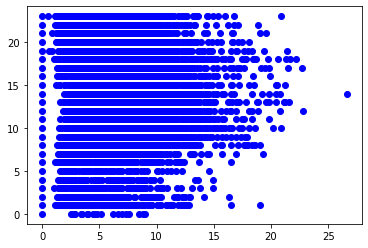

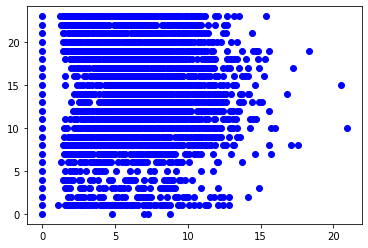

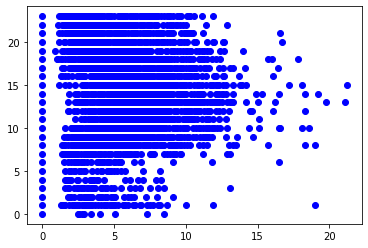

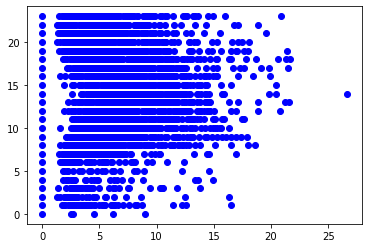

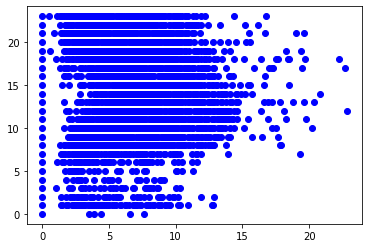

In [51]:
draw(all_WSGust)
draw(spring_WSGust)
draw(summer_WSGust)
draw(autume_WSGust)
draw(winter_WSGust)